In [1]:
#6 Runs of Suoervised Training / Testing : 
#3 datasets (MNIST, Spambase, 20NG) x 2 Classification Algorithms (L2-reg Logistic Regression, Decision Trees).
from sklearn import datasets
from sklearn import tree
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_mldata
from sklearn.linear_model import LogisticRegression
from scipy import sparse
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.model_selection import train_test_split
import numpy as np
import random
import math
import pickle
import matplotlib.pyplot as plt
vectorizer = TfidfVectorizer()

In [31]:
a = np.array([1,2,3,4,-123,3,-43])
b = np.absolute(a)
print np.argsort(b)

[0 1 2 5 3 6 4]


In [58]:
mnist = fetch_mldata('MNIST original')
X_train, X_test, y_train, y_test = train_test_split(mnist.data,mnist.target, test_size=0.15)

In [61]:
clf = tree.DecisionTreeClassifier()
clf_regression = LogisticRegression(penalty='l2',tol=0.1)

In [60]:
reg_mnist = clf_regression.fit(X_train,y_train)
coefficients_mnist = clf_regression.coef_
print "The score for reg : ",clf_regression.score(X_test,y_test)

The score for reg :  0.901904761905


In [41]:
tree_mnist = clf.fit(X_train,y_train)
feat_mn = clf.feature_importances_

In [47]:
print np.argsort(feat_mn)[len(feat_mn)-30:]
print "The score for tree classifier is : ",clf.score(X_test,y_test)

[317 344 376 290 543 321 299 234 489 429 183 294 270 351 296 569  96 455
 550 377 485 319 375 488 431 657 239 155 409 434]
The score for tree classifier is :  0.875714285714


In [22]:
mnist_class = {}
i = 0
for c in coefficients_mnist:
    b = np.absolute(c)
    mnist_class[i] = np.argsort(b)[c.shape[0]-30:]
    i += 1

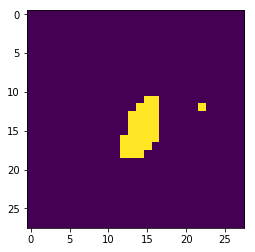

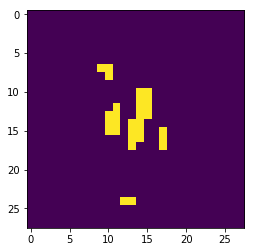

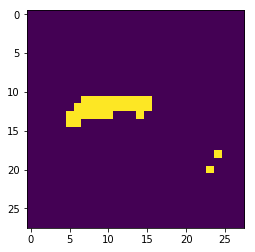

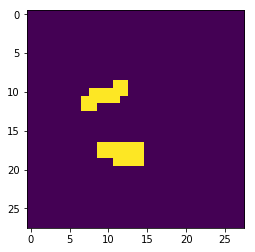

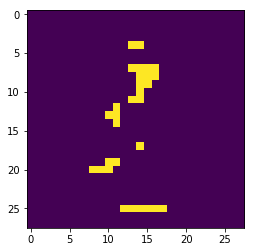

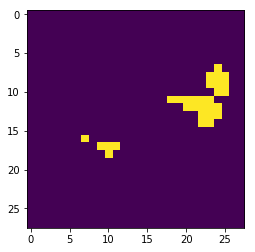

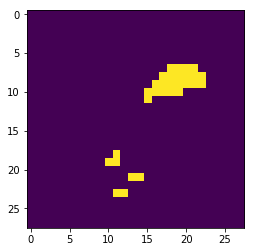

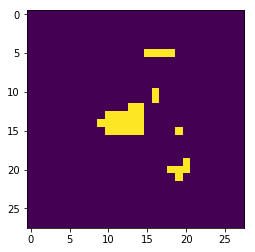

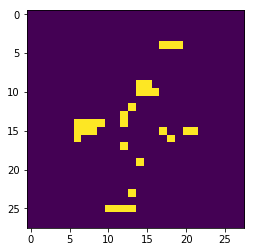

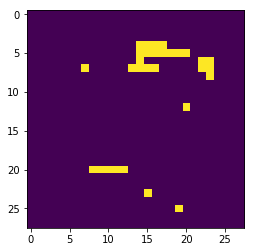

In [23]:
mnist_class
for key in mnist_class:
    a = mnist_class[key]
    img = np.zeros(784)
    for i in a:
        img[i] = 255
    img = img.reshape((28,28))
    plt.imshow(img)
    plt.show()

In [8]:
tree_mnist.predict(X_test)

array([ 9.,  0.,  1., ...,  8.,  3.,  1.])

In [10]:
state = tree_mnist.tree_.__getstate__()['nodes']

In [14]:
#Calculating the top 30 features
i = 0
j = 0
top_features = []
while(i<30) :
    if state[j][2] > 0:
        if state[j][2] not in top_features:
            top_features.append(state[j][2])
            i += 1
    j += 1

In [16]:
state

array([(   1, 1258, 350,  141.5,  0.89973288, 10500,   1.05000000e+04),
       (   2,  827, 568,    0.5,  0.88107072,  6978,   6.97800000e+03),
       (   3,  306, 432,    0.5,  0.83999398,  4251,   4.25100000e+03),
       ...,
       (1967, 1968, 267,  253.5,  0.0665874 ,    29,   2.90000000e+01),
       (  -1,   -1,  -2,   -2. ,  0.        ,    28,   2.80000000e+01),
       (  -1,   -1,  -2,   -2. ,  0.        ,     1,   1.00000000e+00)],
      dtype=[('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')])

In [49]:
data_20 = pickle.load(open( "save.p", "rb" ))

In [50]:
data_20ng = vectorizer.fit_transform(data_20)
features = vectorizer.get_feature_names()
#Getting targets
targets_20ng = list(datasets.fetch_20newsgroups(subset = 'train').target) +list(datasets.fetch_20newsgroups(subset = 'test').target)

In [51]:
data_20ng.shape

(18846, 122277)

In [52]:
X_tr_20 = data_20ng[:16000]
X_te_20 = data_20ng[16000:]

In [62]:
clf_regression.fit(X_tr_20,targets_20ng[:16000])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.1,
          verbose=0, warm_start=False)

In [63]:
print "The score for regression is : ",clf_regression.score(X_te_20,targets_20ng[16000:])

The score for regression is :  0.888264230499


In [53]:
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(X_tr_20,targets_20ng[:16000])
feat_20 = clf_tree.feature_importances_
index = np.argsort(feat_20)[16000-30:]
print "The score for tree is : ",clf_tree.score(X_te_20,targets_20ng[16000:])

The score for tree is :  0.628250175685


In [54]:
for i in index:
    print features[i]

laserjet
lasergraphics
lasergames
laserdisks
laserdiscs
laserdisc
laserdave
laserwriters
laser
las
larynx
laryngospasms
laryngospasm
laryngitis
larussa
larter
larsson
larsons
larsonian
larson
larsen
lascivious
latterday
lattice
lattices
lawbreakers
lawbreaker
lawbook
lavrencic
lavon
lavoie
lavishly
lavishing
lavished
lavey
lavergne
lavelier
lavb
lavange
lavalliere
lavallee
laval
lavail
lava
lav
lautrec
lautenberg
laussane
lausanne
lauro
lawdy
lawenforcmentfield
lawerence
lawers
lawyers
lawyer
lawwed
lawton
lawt
lawsuits
lawsuit
lawson
lawry
lawrenceville
lawrence
lawns
laurm00
lawnmowers
lawnmower
lawnmover
lawn
lawmaster
lawmaking
lawmakers
lawlor
lawless
lawgiver
lawfulness
lawfully
lawful
lawnmowerman
lauritzen
lauritz
lauritsen
lauglin
laughter
laught
laughs
laughlin
laughingstock
laughing
laughin
laugher
laughed
laughable
laugh
laukkanen
lauger
laudicina
lauderdale
lauded
laudable
laud
lauches
lauch
laubsters
lau
latvia
latto
lattitude
lauff
laxemburg
launcer
launchbury
laurila
la

In [38]:
coefficient = clf_regression.coef_
coefficient.shape
words_class = {}
i = 0
for c in coefficient:
    c = np.absolute(c)
    words_class[i] = np.argsort(c)[c.shape[0]-30:]
    i += 1

In [39]:
words = {}
for key in words_class:
    a =[]
    for w in words_class[key]:
        a.append(features[w])
    words[key] = a

In [40]:
words

{0: [u'halat',
  u'moral',
  u'schneider',
  u'perry',
  u'rice',
  u'bil',
  u'atheist',
  u'conner',
  u'morality',
  u'gregg',
  u'jon',
  u'beauchaine',
  u'kmr4',
  u'wingate',
  u'bobbe',
  u'god',
  u'mangoe',
  u'tammy',
  u'cobb',
  u'religion',
  u'rushdie',
  u'islam',
  u'benedikt',
  u'jaeger',
  u'islamic',
  u'atheism',
  u'livesey',
  u'mathew',
  u'atheists',
  u'keith'],
 1: [u'xv',
  u'version',
  u'file',
  u'software',
  u'package',
  u'42',
  u'surface',
  u'looking',
  u'sphere',
  u'computer',
  u'viewer',
  u'vga',
  u'program',
  u'ftp',
  u'gif',
  u'siggraph',
  u'points',
  u'vesa',
  u'files',
  u'animation',
  u'pov',
  u'tiff',
  u'cview',
  u'polygon',
  u'format',
  u'3do',
  u'images',
  u'image',
  u'3d',
  u'graphics'],
 2: [u'w4wg',
  u'would',
  u'instruction',
  u'the',
  u'louray',
  u'fonts',
  u'sale',
  u'supporters',
  u'printer',
  u'deskjet',
  u'using',
  u'challenge',
  u'access',
  u'program',
  u'cica',
  u'win',
  u'mouse',
  u'nt',
 

In [12]:
clf_regression.score(X_te_20,targets_20ng[16000:])

0.87309120924473793

In [15]:
clf.fit(X_tr_20,targets_20ng[:14000])
print clf.score(X_te_20,targets_20ng[14000:])

0.605654147751


In [55]:
f = open("spambase.data","r")
points = []
label = []
i = 0
for line in f:
    l = line.split(",")
    points.append(map(float, l[:len(l)-1]))
    label.append(l[len(l)-1:])
    i += 1

print len(points)
X_train, X_test, y_train, y_test = train_test_split(points,label, test_size=0.15)

4601


In [56]:
clf_sp = tree.DecisionTreeClassifier()
clf_sp.fit(X_train,y_train)
fe_sp = clf_sp.feature_importances_
a = np.argsort(fe_sp)[:-30]
print "The score with decision tree is : ",clf_sp.score(X_test,y_test)

The score with decision tree is :  0.907380607815


In [57]:
print a

[37 30 53 50 31 46 39 40 33 14 38 29 28 42 19  1 22 25  3 47 43 12 11 13  2
  0 35]


In [14]:

clf_regression = LogisticRegression(penalty='l2')
clf_regression.fit(X_train,y_train)
coefficients_spam = clf_regression.coef_
feature_spam = {}
i = 0
for c in coefficients_spam:
    feature_spam[i] = np.argsort(c)[c.shape[0]-30:]
    i += 1

In [15]:
feature_spam

{0: array([33, 54, 31, 36, 56, 55, 18, 17,  9,  2, 21, 20, 13, 51, 27,  8, 23,
         7,  4,  5, 35,  3, 16, 15, 53, 14, 19, 22,  6, 52], dtype=int64)}

In [16]:
print "The score for spam dataset with logistic regression is : ", clf_regression.score(X_test,y_test)

The score for spam dataset with logistic regression is :  0.918958031838
